## Exercise 1: Bayesian optimization

1. Define an objective function which returns the analytic expression of a 1d
   polynomial with coefficients `f(x) = 0.05 (x^6 - 2 x^5 - 28 x^4 + 28 x^3 + 12 x^2 -26 x + 100)`.

2. Plot the previous function using a linear grid of points in x between [-5, 6].

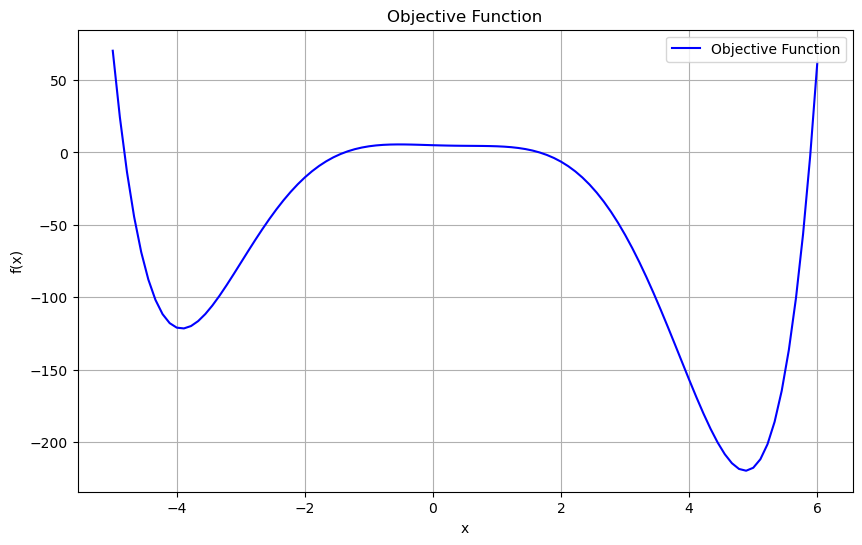

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import hp, pyll

def objective_function(x):
    """
    Objective function to be minimized.
    """
    return 0.05*( x**6 - 2*x**5 - 28*x**4 + 28*x**3 + 12*x**2 -26*x + 100)

x = np.linspace(-5, 6, 100)
y = objective_function(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Objective Function', color='blue')
plt.title('Objective Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()


3. Define an uniform search domain space using hyperopt. With
   `hyperopt.pyll.stochastic.sample` build an histogram with samples from that
   space.

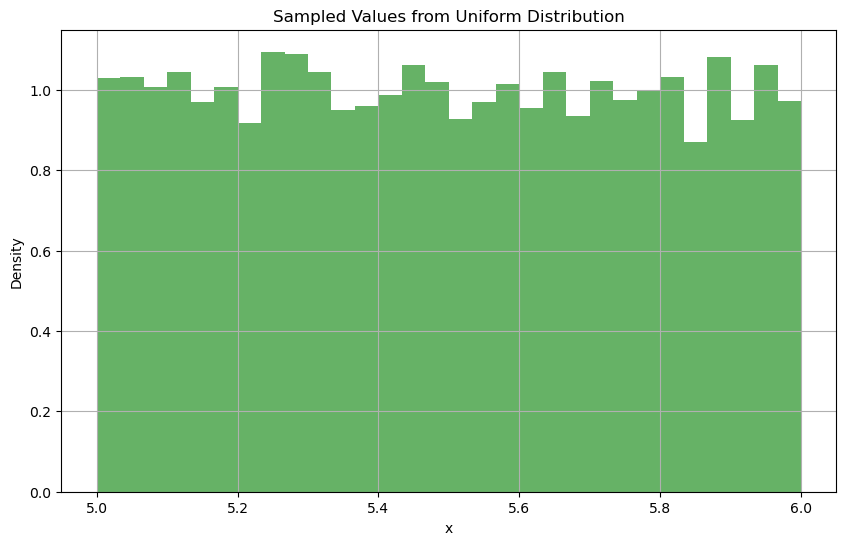

In [6]:
a = hp.uniform("a", 5, 6)

samples = 10000
sample = [pyll.stochastic.sample(a) for _ in range(samples)]

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g')
plt.title('Sampled Values from Uniform Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid()
plt.show()

4. Perform the objective function minimization using the Tree-structured Parzen
   Estimator model, 2000 evaluations and store the trials using
   `hyperopt.Trials`. Print to screen the best value of x. Show scatter plot
   with the x-value vs iteration together with the final best value of x. Show
   the histogram of x-values extracted during the scan.


100%|██████████| 100/100 [00:00<00:00, 867.78trial/s, best loss: -217.7292614192428]
Best value found:  {'a': 5.000596062559659}


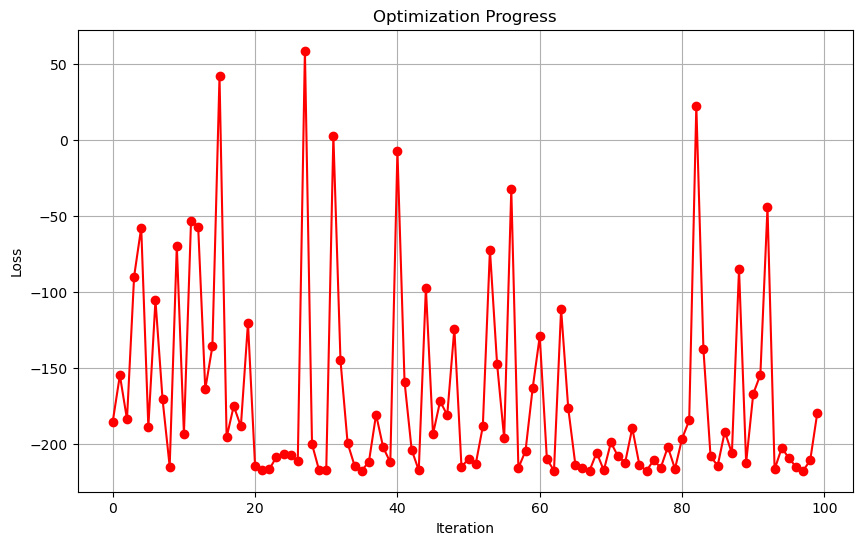

In [9]:
import time
from hyperopt import fmin, tpe, rand, STATUS_OK, Trials

def objective(x):
    return {"loss": objective_function(x), "status": STATUS_OK, "eval_time":time.time()}

algorithm = tpe.suggest 
trials = Trials()
best = fmin(
    fn=objective,
    space=a,
    algo=algorithm,
    max_evals=100,
    trials=trials
)
print("Best value found: ", best) # returns the dictionary with the best values
# iterations = trials.idxs_vals[0]["x"]
# x_values = trials.idxs_vals[1]["x"]

# Extracting the history 
iterations = [t["tid"] for t in trials.trials]
losses = [t["result"]["loss"] for t in trials.trials]
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(iterations, losses, marker='o', linestyle='-', color='r')
plt.title('Optimization Progress')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()


5. Repeat the previous point now using a random search algorithm.

## Exercise 2: Hyperparameter scan for classifier

Write a DL regression model using Keras with the following steps:

**Data loading**

1. Load the mnist dataset from `tensorflow.keras.datasets.mnist`. Study the dataset size (shape) and normalize the pixels.

**DNN model**

2. Design a NN architecture for the classification of all digits.

**Hyperparameter scan**

3. Define a function which parametrizes the learning rate and the number of
   units of the DNN model using a python dict.

4. Use the Tree-structured Parzen Estimator with the
   [hyperopt](http://hyperopt.github.io/hyperopt/) library.

5. Plot the accuracy vs learning rate and number of layers for each trial.